In [25]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error, f1_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
!ls ../input/data-science-london-scikit-learn

test.csv  train.csv  trainLabels.csv


In [28]:
train = pd.read_csv("../input/data-science-london-scikit-learn/train.csv", header = None)
test = pd.read_csv("../input/data-science-london-scikit-learn/test.csv", header = None)
train_label = pd.read_csv("../input/data-science-london-scikit-learn/trainLabels.csv", header = None)

In [30]:
train_label.head()

,0
0,1
1,0
2,0
3,1
4,0


In [31]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [32]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [33]:
print("Shape of train dataframe is {}".format(train.shape))
print("Shape of test dataframe is {}".format(test.shape))
print("Shape of train label dataframe is {}".format(train_label.shape))

Shape of train dataframe is (1000, 40)
Shape of test dataframe is (9000, 40)
Shape of train label dataframe is (1000, 1)


In [34]:
print("Null value in train dataframe is {}".format(train.isnull().sum().any()))
print("Null value in test dataframe is {}".format(test.isnull().sum().any()))
print("Null value in train_label dataframe is {}".format(train_label.isnull().sum().any()))

Null value in train dataframe is False
Null value in test dataframe is False
Null value in train_label dataframe is False


In [35]:
train['target'] = train_label[0]
train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,target
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


In [36]:
dupli = train[train.duplicated()]
dupli

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,target


In [38]:
for i in train.columns:
    if train[i].nunique() == 1:
        print(i)
        train.drop(i, inplace = True, axis = 1)
        test.drop(i, inplace = True, axis = 1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9000 non-null   float64
 1   1       9000 non-null   float64
 2   2       9000 non-null   float64
 3   3       9000 non-null   float64
 4   4       9000 non-null   float64
 5   5       9000 non-null   float64
 6   6       9000 non-null   float64
 7   7       9000 non-null   float64
 8   8       9000 non-null   float64
 9   9       9000 non-null   float64
 10  10      9000 non-null   float64
 11  11      9000 non-null   float64
 12  12      9000 non-null   float64
 13  13      9000 non-null   float64
 14  14      9000 non-null   float64
 15  15      9000 non-null   float64
 16  16      9000 non-null   float64
 17  17      9000 non-null   float64
 18  18      9000 non-null   float64
 19  19      9000 non-null   float64
 20  20      9000 non-null   float64
 21  21      9000 non-null   float64
 22  

In [42]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


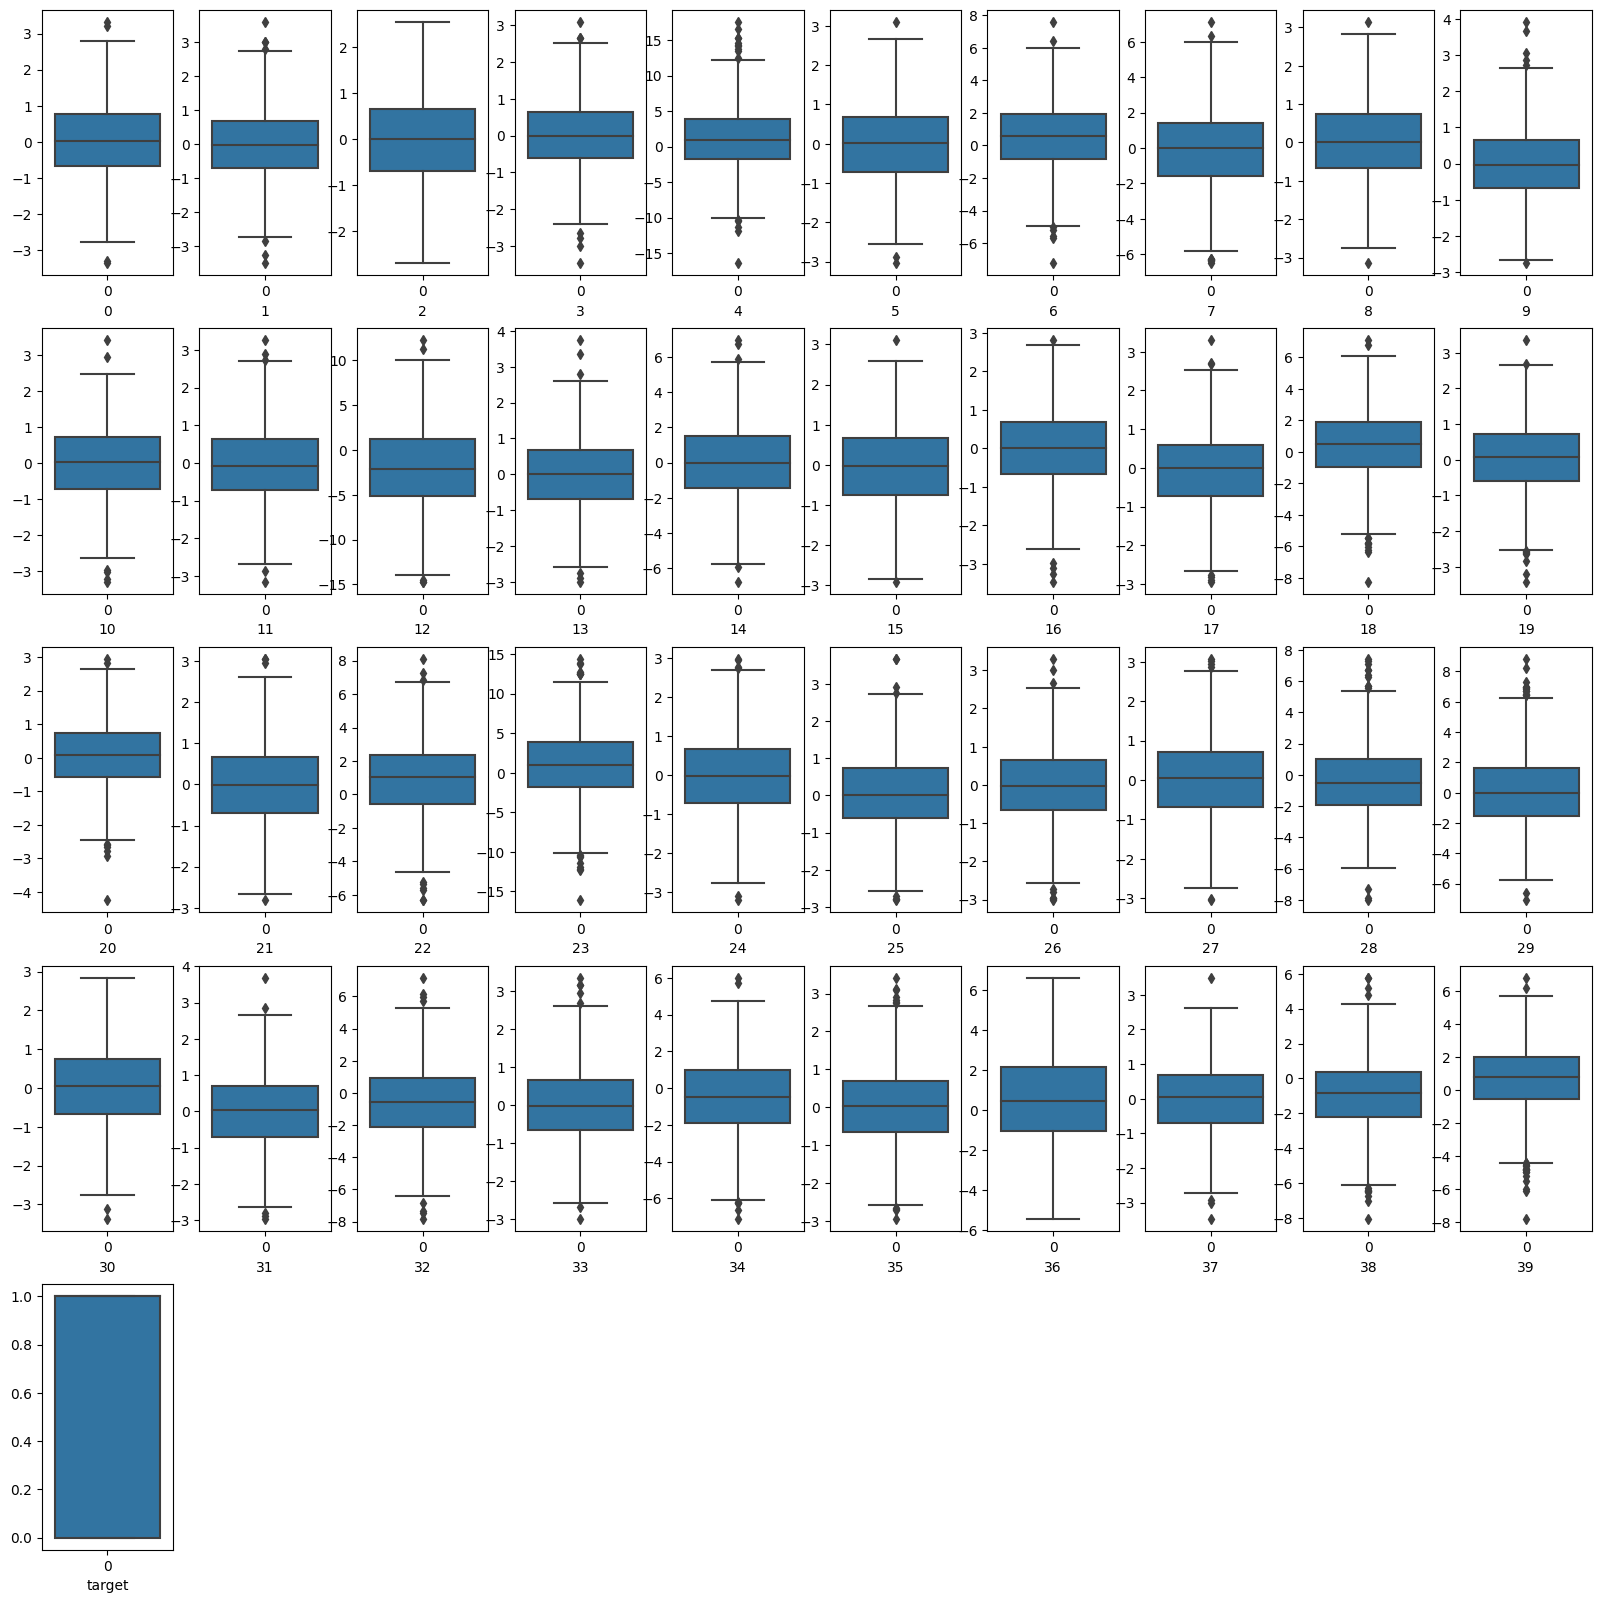

In [43]:
plt.figure(figsize = (20,20))
for i in range (len(train.columns)):
    plt.subplot(5, 10, i+1)
    sns.boxplot(train.iloc[:,i])
    plt.xlabel(train.columns[i], size = 10)

In [44]:
def Outliers(data, ft):
    
    IQ1 = data[ft].quantile(0.25)
    IQ3 = data[ft].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound) ]
    return index

In [45]:
index = []
for i in train.columns:
    index.extend(Outliers(train, i))
index = list(set(index))
len(index)

247

target
1    510
0    490
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution in target column before resmpling')

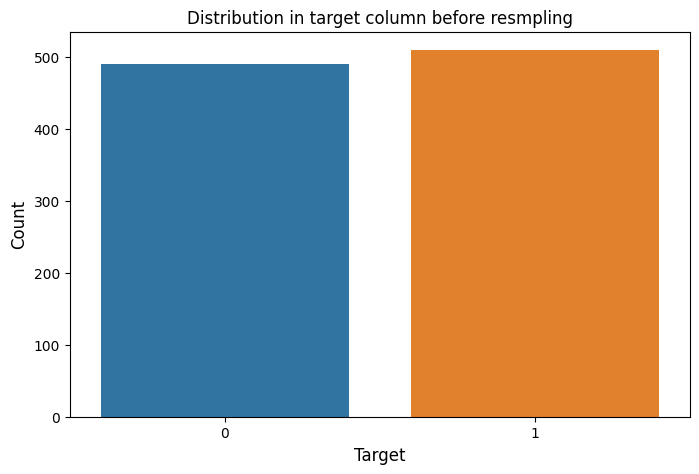

In [46]:
print(train['target'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = train['target'])
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target column before resmpling', size = 12)

In [47]:
x = train.drop('target', axis = 1)
col = x.columns
std = StandardScaler()
x_std = std.fit_transform(x)
x = pd.DataFrame(data = x_std, columns = col)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.271694,-1.183412,1.555777,-1.210073,0.925265,0.217014,0.900554,0.731639,-0.077955,0.658265,...,-0.871410,-0.645377,-0.576450,0.298091,1.903665,0.679793,1.229941,-2.730228,-0.885572,-0.248677
1,-1.190511,0.351139,0.995287,-1.322617,0.243958,-0.146686,-0.436490,1.190929,-0.791829,-0.089025,...,-0.841033,-0.010905,1.152986,0.469876,-0.016107,0.386427,0.106214,1.209835,1.125967,-1.187240
2,1.157622,-0.383785,0.093134,-2.300095,0.565748,0.096352,-0.138780,-1.874007,-1.210629,-1.220826,...,-0.628156,0.726468,-1.258713,0.849944,-1.069674,-1.605605,0.496264,0.651454,-0.019700,1.163161
3,1.535729,-0.547152,-0.860645,-0.620088,0.448222,0.886648,-0.311336,2.033736,1.011781,-1.075128,...,0.981376,1.251553,-1.312129,-1.031019,1.243569,1.520225,0.987951,0.209498,0.748291,0.623135
4,-0.633738,-0.610045,1.161480,-0.031054,0.528553,-0.005750,0.446783,-1.905931,-1.786693,0.800827,...,0.477930,-1.824829,0.473942,-0.189268,-2.009724,-1.543292,0.567400,0.866404,-0.495767,-0.098374


In [48]:
y = train.loc[:, 'target']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [54]:
def Models(model, name, d, xtrain, ytrain, xtest, ytest):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100
    
    F1 = f1_score(predicted, ytest)
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [79]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'F1_Score': [], 'MSE': []}
    
models = [ 
    [RandomForestClassifier(n_estimators = 200), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], 
          
]
for model in models:
    d = Models(model[0], model[1], d, xtrain, ytrain, xtest, ytest)


Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************



In [80]:
acu_data = pd.DataFrame(data = d)
acu_data

,Name,Training ACU,Testing ACU,F1_Score,MSE
0,Random Forest,100.0,87.6,0.874494,0.124
1,Decision Tree,100.0,71.2,0.712000,0.288


In [82]:
params = {
    "n_estimators": [i for i in range (10, 800, 10)], 
    "max_depth": [i for i in range (2, 40, 2)],
    "min_samples_leaf" : [i for i in range (15, 40)],
    "min_samples_split" : [i for i in range (5,240)]
}
rcla = RandomForestClassifier()
rcla

RandomForestClassifier()

In [83]:
grid = RandomizedSearchCV(estimator = rcla, param_distributions = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, 34, 36, 38],
                                        'min_samples_leaf': [15, 16, 17, 18, 19,
                                                             20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38,
                                                             39],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25, 26,
                                                              27, 28, 29, 30,
                                                              31, 32, 33, 34, ...],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [84]:
best_param_rf = grid.best_params_
best_param_rf

{'n_estimators': 110,
 'min_samples_split': 28,
 'min_samples_leaf': 20,
 'max_depth': 18}

In [85]:
grid.best_score_

0.8280000000000001

In [86]:
rcla = RandomForestClassifier(**best_param_rf)
rcla.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=18, min_samples_leaf=20, min_samples_split=28,
                       n_estimators=110)

In [89]:
predicted = rcla.predict(xtrain)
train_score = accuracy_score(predicted, ytrain)*100
print("Accuracy using Random Forest on training data is {} %".format(train_score))

Accuracy using Random Forest on training data is 89.86666666666666 %


In [90]:
predicted = rcla.predict(xtest)
test_score = accuracy_score(predicted , ytest)*100
f1 = f1_score(ytest, predicted)
print("F1 Score using Random Forest testing data is {} %".format(f1))

F1 Score using Random Forest testing data is 0.8273092369477911 %


In [91]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [94]:
col = test.columns
std = StandardScaler()
x_std = std.fit_transform(test)
x_test = pd.DataFrame(data = x_std, columns = col)


predicted = rcla.predict(x_test)
predicted

array([1, 0, 0, ..., 1, 0, 1])

In [95]:
l = [i for i in range (1, len(predicted)+1)]
len(l)

9000

In [96]:
submit = pd.DataFrame(data = {'Id': l, 'Solution': predicted})
submit

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
8995,8996,1
8996,8997,1
8997,8998,1
8998,8999,0


In [97]:
submit.to_csv('Submission1.csv', index = False)
submit.head()

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
